In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

sns.set_style('darkgrid')
warnings.filterwarnings('ignore')

In [4]:
''' reading dataset '''
df = pd.read_json('News_Category_Dataset_v2.json', lines=True)

In [5]:
''' displaying first 5 rows '''
df.head()

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26


In [6]:
''' shape of dataset '''
df.shape

(200853, 6)

In [7]:
''' checking null values '''
df.isnull().sum()

category             0
headline             0
authors              0
link                 0
short_description    0
date                 0
dtype: int64

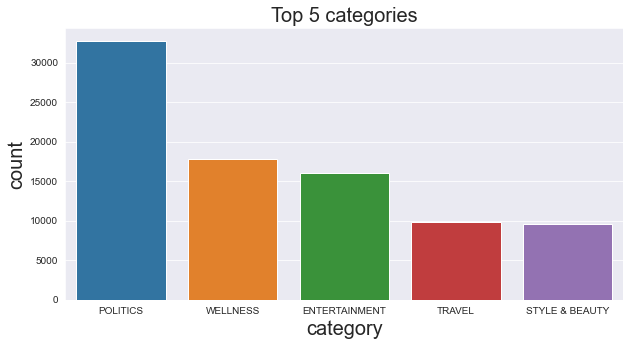

In [16]:
''' unique categories in category columns '''
category_label = df.category.value_counts()[:5]
plt.figure(figsize=(10, 5))
sns.barplot(category_label.index, category_label)
plt.xlabel('category', fontsize=20)
plt.ylabel('count', fontsize=20);
plt.title('Top 5 categories', fontsize=20);

In [17]:
''' checking info of data '''
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200853 entries, 0 to 200852
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   category           200853 non-null  object        
 1   headline           200853 non-null  object        
 2   authors            200853 non-null  object        
 3   link               200853 non-null  object        
 4   short_description  200853 non-null  object        
 5   date               200853 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 9.2+ MB


In [18]:
''' converting category column into category_label_encoding '''
category_label_enc = {value: key for key, value in enumerate(df.category.unique())}
category_label_enc

{'CRIME': 0,
 'ENTERTAINMENT': 1,
 'WORLD NEWS': 2,
 'IMPACT': 3,
 'POLITICS': 4,
 'WEIRD NEWS': 5,
 'BLACK VOICES': 6,
 'WOMEN': 7,
 'COMEDY': 8,
 'QUEER VOICES': 9,
 'SPORTS': 10,
 'BUSINESS': 11,
 'TRAVEL': 12,
 'MEDIA': 13,
 'TECH': 14,
 'RELIGION': 15,
 'SCIENCE': 16,
 'LATINO VOICES': 17,
 'EDUCATION': 18,
 'COLLEGE': 19,
 'PARENTS': 20,
 'ARTS & CULTURE': 21,
 'STYLE': 22,
 'GREEN': 23,
 'TASTE': 24,
 'HEALTHY LIVING': 25,
 'THE WORLDPOST': 26,
 'GOOD NEWS': 27,
 'WORLDPOST': 28,
 'FIFTY': 29,
 'ARTS': 30,
 'WELLNESS': 31,
 'PARENTING': 32,
 'HOME & LIVING': 33,
 'STYLE & BEAUTY': 34,
 'DIVORCE': 35,
 'WEDDINGS': 36,
 'FOOD & DRINK': 37,
 'MONEY': 38,
 'ENVIRONMENT': 39,
 'CULTURE & ARTS': 40}

In [42]:
''' preprocessing '''

def get_seq(t, token, train=True, max_seq_length=0):
    ''' converting text into sequence '''
    seq = token.texts_to_sequences(t)
    if train == True:
        max_seq_length = np.max(list(map(lambda x: len(x), seq)))
    ''' adding padding '''
    seq = pad_sequences(seq, maxlen=max_seq_length, padding='post')
    return seq

def pi(df, lbl_map=None):
    ''' making copy of data '''
    df_copy = df.copy()
    
    ''' taking only two columns '''
    df_copy = df_copy.loc[:, ['headline', 'category']]
    
    '''Sample 1000 examples from each category'''
    cat_sam = []

    for category in df['category'].unique():
        cat_slice = df.query("category == @category")
        cat_sam.append(cat_slice.sample(1000, random_state=1))
        
    df_copy = pd.concat(cat_sam, axis=0).sample(frac=1.0, random_state=1).reset_index(drop=True)
    
    '''Map the labels to integers'''
    df_copy['category'] = df_copy['category'].replace(lbl_map)
    
    ''' dependent and independent features '''
    y = df_copy['category']
    X = df_copy['headline']
    
    ''' train test split '''
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, shuffle=True, random_state=42)
    
    '''Fit a tokenizer'''
    token = Tokenizer(num_words=10000)
    token.fit_on_texts(X_train)
    
    '''Get sequence data'''
    X_train = get_seq(X_train, token, train=True)
    X_test = get_seq(X_test, token, train=False, max_seq_length=X_train.shape[1])
    
    return X_train, X_test, y_train, y_test

In [43]:
X_train, X_test, y_train, y_test = pi(df, lbl_map=category_label_enc)

In [44]:
X_train

array([[ 490, 2711,   51, ...,    0,    0,    0],
       [  18, 6134,    2, ...,    0,    0,    0],
       [   1,   55,    3, ...,    0,    0,    0],
       ...,
       [  93,  751, 1669, ...,    0,    0,    0],
       [ 451,  517,  230, ...,    0,    0,    0],
       [   1,   47,  812, ...,    0,    0,    0]])

In [45]:
X_test

array([[ 972,  532,   57, ...,    0,    0,    0],
       [ 235,    3,  336, ...,    0,    0,    0],
       [4026,   10,  801, ...,    0,    0,    0],
       ...,
       [  45,   12, 5836, ...,    0,    0,    0],
       [ 331,   14,    3, ...,    0,    0,    0],
       [ 942, 1064,    5, ...,    0,    0,    0]])

In [46]:
y_train

37613    15
12969    28
13330    19
819      23
46       19
         ..
6265     13
11284    26
38158    16
860      36
15795     8
Name: category, Length: 30750, dtype: int64

In [47]:
y_test

857       2
144      23
22961     9
19448    18
2331     18
         ..
28452     4
36845    24
32015    22
1277     39
31143    40
Name: category, Length: 10250, dtype: int64

In [48]:
''' shape of xtrain and xtest '''
print("X_test shape: ", X_test.shape)
print("X_train shape: ", X_train.shape)

X_test shape:  (10250, 25)
X_train shape:  (30750, 25)


In [52]:
''' Model '''
num_classes = len(df['category'].unique())

inp = tf.keras.Input(shape=(X_train.shape[1],))
emb = tf.keras.layers.Embedding(input_dim=10000, output_dim=64)(inp)
fltn = tf.keras.layers.Flatten()(emb)
d1 = tf.keras.layers.Dense(128, activation='relu')(fltn)
d2 = tf.keras.layers.Dense(128, activation='relu')(d1)
out = tf.keras.layers.Dense(num_classes, activation='softmax')(d2)
model = tf.keras.Model(inp, out)

In [53]:
''' model looks like '''
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 25)]              0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 25, 64)            640000    
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 41)                5289      
Total params: 866,729
Trainable params: 866,729
Non-trainable params: 0
_______________________________________________________

In [55]:
''' compile the model '''
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [56]:
''' training '''
history = model.fit(X_train, y_train, validation_split=0.2, batch_size=64, epochs=100,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)])

Epoch 1/100
385/385 [==============================] - 22s 48ms/step - loss: 3.6769 - accuracy: 0.0353 - val_loss: 3.2651 - val_accuracy: 0.1218
Epoch 2/100
385/385 [==============================] - 16s 41ms/step - loss: 2.8310 - accuracy: 0.2209 - val_loss: 2.6468 - val_accuracy: 0.2917
Epoch 3/100
385/385 [==============================] - 13s 35ms/step - loss: 1.5614 - accuracy: 0.5750 - val_loss: 2.8481 - val_accuracy: 0.3221
Epoch 4/100
385/385 [==============================] - 14s 37ms/step - loss: 0.6787 - accuracy: 0.8304 - val_loss: 3.4511 - val_accuracy: 0.3096
Epoch 5/100
385/385 [==============================] - 14s 35ms/step - loss: 0.2619 - accuracy: 0.9436 - val_loss: 4.1907 - val_accuracy: 0.2992


In [58]:
''' evaluating model '''
model.evaluate(X_test, y_test, verbose=0)[1] * 100

29.86341416835785

In [59]:
''' prediction '''
ypred = model.predict(X_test)
ypred = np.argmax(ypred, axis=1)

Classification report: 
               precision    recall  f1-score   support

           0       0.41      0.55      0.47       237
           1       0.32      0.11      0.17       262
           2       0.23      0.04      0.07       253
           3       0.11      0.13      0.12       257
           4       0.36      0.22      0.27       255
           5       0.15      0.26      0.19       249
           6       0.30      0.03      0.05       253
           7       0.29      0.13      0.17       255
           8       0.63      0.36      0.46       270
           9       0.50      0.46      0.48       250
          10       0.32      0.43      0.37       236
          11       0.22      0.11      0.14       235
          12       0.32      0.29      0.31       248
          13       0.40      0.43      0.42       246
          14       0.49      0.41      0.45       251
          15       0.14      0.33      0.20       237
          16       0.44      0.21      0.28       265
  

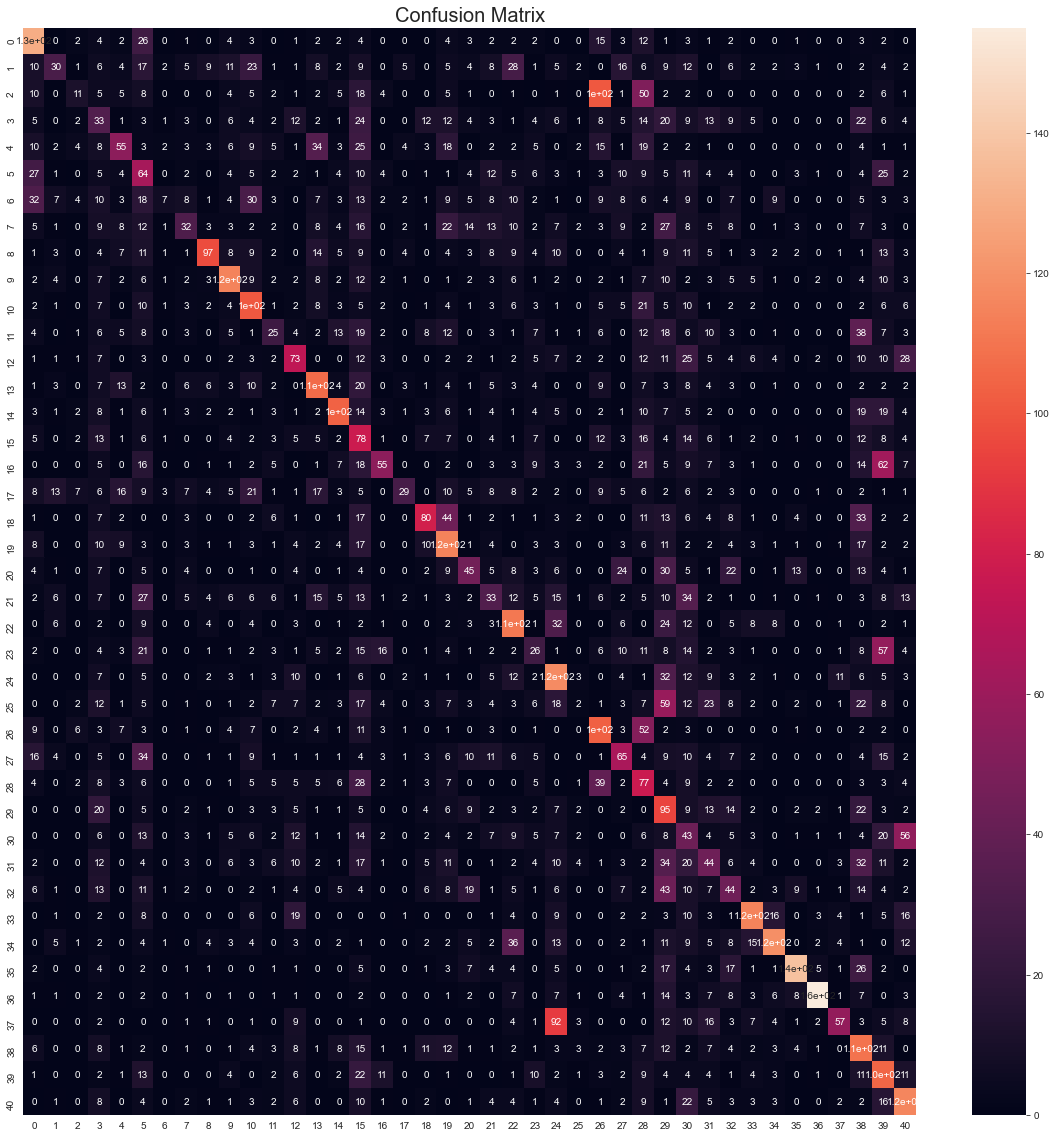

In [65]:
print("Classification report: \n", classification_report(y_test, ypred))
print("-"*100)
print()

print("Accuracy Score: ", accuracy_score(y_test, ypred))
print("-"*100)
print()

print("Confusion Matrix \n")
plt.figure(figsize=(20, 20))
sns.heatmap(confusion_matrix(y_test, ypred), annot=True);
plt.title('Confusion Matrix', fontsize=20);